<a href="https://colab.research.google.com/github/Elnabrees/Parallel-Computing/blob/main/titanic_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1- Load the dataset from keggle**

In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/titanic-dataset


**2- Read the dataset using panda**

In [8]:
import pandas as pd

dataset_path = "/kaggle/input/titanic-dataset/Titanic-Dataset.csv"
df = pd.read_csv(dataset_path)

# Preview the data
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Titanic Dataset - Classification Pipeline**

🔹 5.2 Experimental Setup

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

# Quick overview
print(df.info())
print(df.head())

# Drop columns that won’t help
df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

# Define features and target
X = df.drop(columns=['Survived'])
y = df['Survived']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   N

<ipython-input-29-313390544952>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-29-313390544952>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

5.3 Performance Measure
We will use:

Accuracy

Classification Report

Confusion Matrix **bold text**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import pandas as pd

# Load the dataset again (if needed)
df = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")
df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Encode categorical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

# Set up feature dataframe (for column names)
X_df = df.drop(columns=['Survived'])
y = df['Survived']

# Split before scaling and feature selection
X_train_df, X_test_df, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# Feature selection
selector = SelectKBest(score_func=f_classif, k=5)
X_train_selected = selector.fit_transform(X_train_df, y_train)
X_test_selected = selector.transform(X_test_df)

# Get selected feature names
selected_mask = selector.get_support()
selected_features = X_df.columns[selected_mask]
print("✅ Selected Features:", list(selected_features))

# Scale selected features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# --- Train & Evaluate Models ---

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_test_scaled)
lr_proba = lr.predict_proba(X_test_scaled)[:, 1]

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
rf_preds = rf.predict(X_test_scaled)
rf_proba = rf.predict_proba(X_test_scaled)[:, 1]

# SVM
svm = SVC(probability=True)
svm.fit(X_train_scaled, y_train)
svm_preds = svm.predict(X_test_scaled)
svm_proba = svm.predict_proba(X_test_scaled)[:, 1]

# --- Print Results ---
print("\n🔹 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, lr_preds))
print("ROC AUC:", roc_auc_score(y_test, lr_proba))
print(classification_report(y_test, lr_preds))

print("\n🔹 Random Forest")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("ROC AUC:", roc_auc_score(y_test, rf_proba))
print(classification_report(y_test, rf_preds))

print("\n🔹 SVM")
print("Accuracy:", accuracy_score(y_test, svm_preds))
print("ROC AUC:", roc_auc_score(y_test, svm_proba))
print(classification_report(y_test, svm_preds))


<ipython-input-30-4492186bae1a>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-30-4492186bae1a>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

✅ Selected Features: ['Pclass', 'Sex', 'Parch', 'Fare', 'Embarked']

🔹 Logistic Regression
Accuracy: 0.776536312849162
ROC AUC: 0.8618404118404117
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.72      0.74      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179


🔹 Random Forest
Accuracy: 0.8044692737430168
ROC AUC: 0.8655083655083655
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179


🔹 SVM
Accuracy: 0.8044692737430168
ROC AUC: 0.8212998712998714
              precision    recall  f1-score   support

      

**5.4 Optimization Strategy – Hyperparameter Tuning with GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Define parameter grids for each model
param_grids = {
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20]
    },
    "SVM": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"]
    },
    "Logistic Regression": {
        "C": [0.1, 1, 10],
        "solver": ["lbfgs"]
    }
}

# Define the models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Dictionary to hold the best estimators
best_models = {}

# Run GridSearchCV for each model
for model_name in models:
    print(f"🔍 Tuning {model_name}...")
    grid_search = GridSearchCV(models[model_name], param_grids[model_name], cv=5, scoring="accuracy")
    grid_search.fit(X_train, y_train)
    print(f"✅ Best Parameters for {model_name}: {grid_search.best_params_}")
    best_models[model_name] = grid_search.best_estimator_


🔍 Tuning Random Forest...
✅ Best Parameters for Random Forest: {'max_depth': 10, 'n_estimators': 200}
🔍 Tuning SVM...
✅ Best Parameters for SVM: {'C': 1, 'kernel': 'rbf'}
🔍 Tuning Logistic Regression...
✅ Best Parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}


What this does:

Tunes Random Forest, SVM, and Logistic Regression.

Uses 5-fold cross-validation.

Stores the best models in best_models for future evaluation. bold text

6. Results and Discussion
🔸 6.1 Results of Investigating the Effect of Feature Selection
python
Copy
Edit


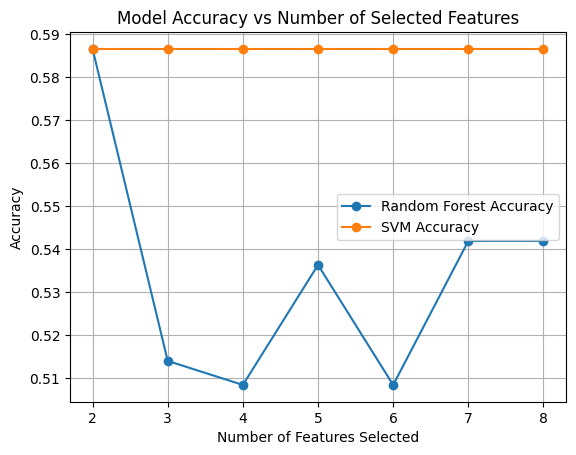

In [ ]:
results = {}

# Try different numbers of top features
for k in range(2, X.shape[1]+1):
    selector = SelectKBest(score_func=f_classif, k=k)
    X_new = selector.fit_transform(X_scaled, y)

    # Train RF
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_new[X_train.shape[0]*-1:], y_train)
    rf_preds = rf.predict(X_new[:X_test.shape[0]])
    rf_acc = accuracy_score(y_test, rf_preds)

    # Train SVM
    svm = SVC()
    svm.fit(X_new[X_train.shape[0]*-1:], y_train)
    svm_preds = svm.predict(X_new[:X_test.shape[0]])
    svm_acc = accuracy_score(y_test, svm_preds)

    results[k] = {
        "Random Forest Accuracy": rf_acc,
        "SVM Accuracy": svm_acc
    }

# Convert to DataFrame for plotting
res_df = pd.DataFrame(results).T
res_df.plot(marker='o')
plt.title("Model Accuracy vs Number of Selected Features")
plt.xlabel("Number of Features Selected")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [ ]:


import pandas as pd


survived_ds_passengers = df[(df['Pclass'] == 3) & (df['Survived'] == 1)]

survived_ds_passengers


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
2,3,1,3,0,26.0,0,0,7.9250,2
8,9,1,3,0,27.0,0,2,11.1333,2
10,11,1,3,0,4.0,1,1,16.7000,2
19,20,1,3,0,28.0,0,0,7.2250,0
22,23,1,3,0,15.0,0,0,8.0292,1
...,...,...,...,...,...,...,...,...,...
838,839,1,3,1,32.0,0,0,56.4958,2
855,856,1,3,0,18.0,0,1,9.3500,2
858,859,1,3,0,24.0,0,3,19.2583,0
869,870,1,3,1,4.0,1,1,11.1333,2


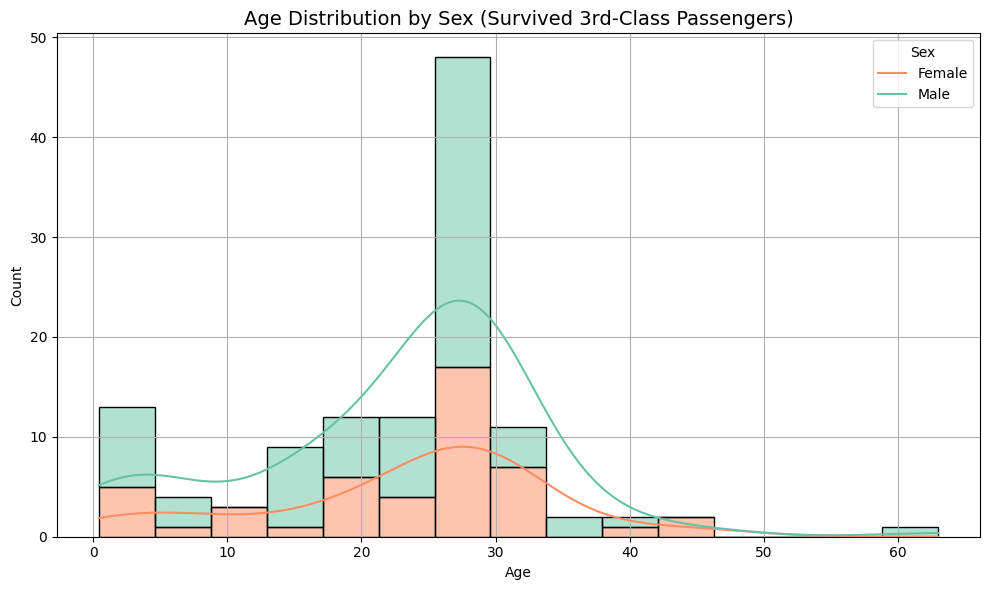

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter survived 3rd-class passengers
survived_ds_passengers = df[(df['Pclass'] == 3) & (df['Survived'] == 1)]

# Drop rows with missing ages
survived_ds_passengers = survived_ds_passengers.dropna(subset=['Age'])

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=survived_ds_passengers, x='Age', hue='Sex', bins=15, kde=True, palette='Set2', multiple='stack')

# Labels and title
plt.title('Age Distribution by Sex (Survived 3rd-Class Passengers)', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Female', 'Male'])  # assumes 'female' comes before 'male'
plt.grid(True)
plt.tight_layout()
plt.show()


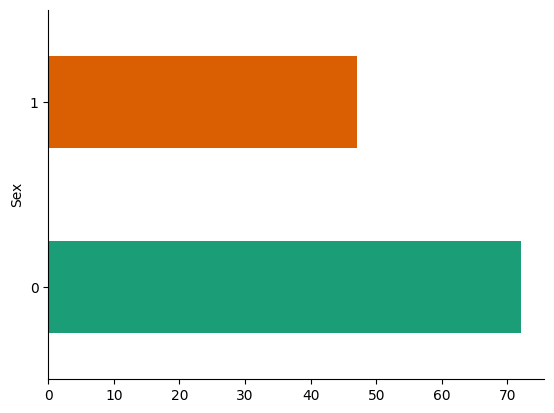

In [ ]:
# @title Sex

from matplotlib import pyplot as plt
import seaborn as sns
survived_ds_passengers.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

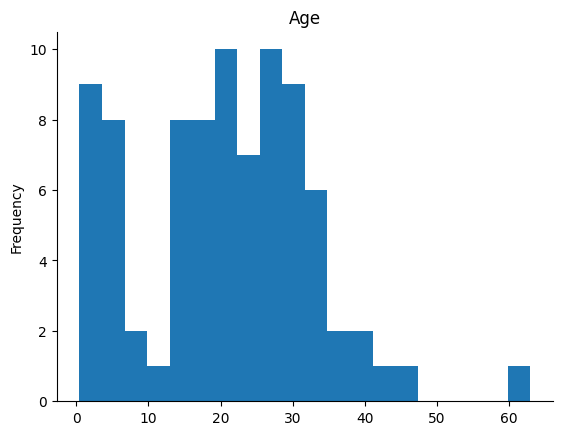

In [ ]:
# @title Age

from matplotlib import pyplot as plt
survived_ds_passengers['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

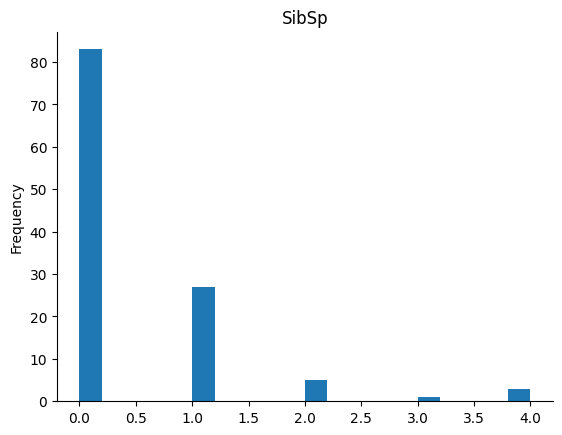

In [ ]:
# @title SibSp

from matplotlib import pyplot as plt
survived_ds_passengers['SibSp'].plot(kind='hist', bins=20, title='SibSp')
plt.gca().spines[['top', 'right',]].set_visible(False)